# DBSCAN
Density Based Spatial Clustering of Application with Noise

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
#Reading the data
df = pd.read_csv(r"E:/Dataset/penguins.csv")
df.head()

,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0


In [3]:
#Excluding Y variable and saving it into a new variable
y=df.y

In [4]:
data = df.drop('y',axis=1) #col wise operation so axis = 1 and for row wise axis = 0
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,55.8,19.8,207.0,4000.0
338,43.5,18.1,202.0,3400.0
339,49.6,18.2,193.0,3775.0
340,50.8,19.0,210.0,4100.0


In [5]:
#Normalizing data in the scale of 0 to 1 using standard scaller
data_scale = StandardScaler().fit_transform(data)
data_scale

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256]])

In [6]:
#Converting into dataframes with column names
df_scaled = pd.DataFrame(data_scale,columns=data.columns)
df_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947
338,-0.077396,0.481175,0.077258,-1.001215
339,1.041543,0.531887,-0.563715,-0.532923
340,1.261662,0.937586,0.647013,-0.127069


In [7]:
#Applying KNN for finding Eps value when k=7 
knn = NearestNeighbors(n_neighbors=7)

In [8]:
#fitting the model into dataset
knn.fit(df_scaled)

NearestNeighbors(n_neighbors=7)

In [9]:
#finding the closest neighbours,i.e distance and index values
dist, ind = knn.kneighbors(df_scaled)

In [10]:
dist
#distance of the data points

array([[0.        , 0.31158625, 0.32574369, ..., 0.37905985, 0.40118008,
        0.44726081],
       [0.        , 0.3293166 , 0.40476285, ..., 0.43064932, 0.45757293,
        0.4698828 ],
       [0.        , 0.24381594, 0.44607676, ..., 0.51383318, 0.53315773,
        0.55270967],
       ...,
       [0.        , 0.33095534, 0.375838  , ..., 0.42352201, 0.45078984,
        0.54452304],
       [0.        , 0.45650769, 0.47037203, ..., 0.53316758, 0.6154575 ,
        0.67679236],
       [0.        , 0.24677198, 0.29103504, ..., 0.33324769, 0.3960698 ,
        0.40620936]])

In [11]:
#finding the min distances first by sorting the distances
dist = np.sort(dist,axis=0)
dist

array([[0.        , 0.10899102, 0.16500734, ..., 0.28252037, 0.31582032,
        0.33391703],
       [0.        , 0.10899102, 0.1890637 , ..., 0.29253219, 0.32446103,
        0.334381  ],
       [0.        , 0.10899102, 0.19609952, ..., 0.29658362, 0.32507647,
        0.33646422],
       ...,
       [0.        , 0.89258729, 0.9699639 , ..., 1.02128551, 1.19990352,
        1.2391979 ],
       [0.        , 0.91089814, 1.00045721, ..., 1.51080591, 1.58879383,
        1.65807429],
       [0.        , 1.45887147, 1.62902101, ..., 1.66883851, 1.68551427,
        1.6893674 ]])

In [12]:
dist= dist[:,1] #All rows and first col using indexing

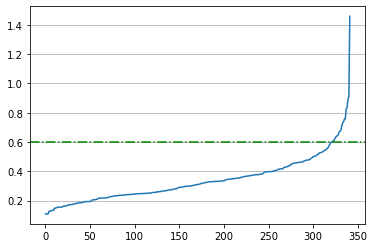

In [20]:
plt.plot(dist)
plt.grid(axis='y')
plt.axhline(y=0.6, color='green',ls='-.')

From the above graph we got an Eps value = 0.6(bending point),when the min points are 7

In [17]:
#Lets train DBSCAN 
dbscan = DBSCAN(eps=0.6,min_samples=7)

In [18]:
dbscan.fit(df_scaled)

DBSCAN(eps=0.6, min_samples=7)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

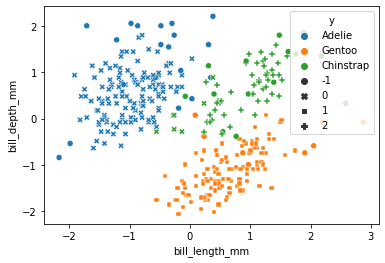

In [24]:
#visualizing the clusters and including Y variable 
sns.scatterplot(df_scaled['bill_length_mm'],df_scaled['bill_depth_mm'],hue=y,style=dbscan.labels_) 
